In [59]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pickle as pk
import time as tm
from sklearn.model_selection import train_test_split

In [60]:

## Import the Data
path = '/Users/james/projects/ml_model_web/model_dev/data/holding'
df_tgt = pd.read_csv(path+'/tgt.csv')
df_train = pd.read_csv(path+'/preds.csv')
df_tgt

,beer_style
0,Hefeweizen
1,English Strong Ale
2,Foreign / Export Stout
3,German Pilsener
4,American Double / Imperial IPA
...,...
1518473,Pumpkin Ale
1518474,Pumpkin Ale
1518475,Pumpkin Ale
1518476,Pumpkin Ale


In [61]:
df_train

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
0,-2.339981,-2.081602,-1.927858,-2.439305,-2.302150,-0.957223
1,-1.219254,-1.662536,-1.379136,-1.165540,-1.180603,-0.242437
2,-1.219254,-1.662536,-1.379136,-1.165540,-1.180603,-0.087135
3,-1.219254,-1.134514,-0.691253,-1.699460,-1.180603,-0.957223
4,0.134213,1.194788,0.149689,0.282794,1.047242,0.463374
...,...,...,...,...,...,...
1518473,2.097521,0.285412,-0.691253,0.282794,0.160674,-0.826077
1518474,0.134213,2.248182,-1.927858,-2.120381,0.160674,-0.826077
1518475,1.033107,-0.488172,-1.379136,-0.508138,0.160674,-0.826077
1518476,0.134213,1.194788,1.157290,1.216933,1.047242,-0.826077


In [62]:
## transform the target for classification 
df_tgt_ohe = pd.get_dummies(df_tgt['beer_style'])
df_tgt_ohe_a = np.array(df_tgt_ohe)
print(df_tgt_ohe_a) ## Check the outcome

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [63]:
## Split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(df_train, df_tgt_ohe_a, test_size = .30, random_state = 46)
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (1062934, 6)
X_test.shape: (455544, 6)
y_train.shape: (1062934, 104)
y_test.shape: (455544, 104)


In [64]:
## Build the model
model = keras.Sequential([
    layers.Dense(256, activation = 'relu'),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(104, activation = 'softmax')
])

In [93]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(multi_label = True, name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [96]:
## Compile the model 

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = METRICS)

In [97]:
## partial train data

X_val = X_train[:100000]
partial_X_train = X_train[100000:]
y_val = y_train[:100000]
partial_y_train = y_train[100000:]

In [98]:
## Check the model thinking and settings with partial data (100000 rows compared with 1000000 rows)
history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs = 30,
                   batch_size = 512,
                   validation_data = (X_val, y_val))

Epoch 1/30
1881/1881 [==============================] - 20s 10ms/step - loss: 2.9988 - tp: 26620.0000 - fp: 16553.0000 - tn: 99165560.0000 - fn: 936314.0000 - accuracy: 0.9905 - precision: 0.6166 - recall: 0.0276 - auc: 0.8355 - prc: 0.1789 - val_loss: 3.0215 - val_tp: 1959.0000 - val_fp: 1515.0000 - val_tn: 10298485.0000 - val_fn: 98041.0000 - val_accuracy: 0.9904 - val_precision: 0.5639 - val_recall: 0.0196 - val_auc: 0.8388 - val_prc: 0.1705
Epoch 2/30
1881/1881 [==============================] - 18s 9ms/step - loss: 2.9986 - tp: 25804.0000 - fp: 15749.0000 - tn: 99166432.0000 - fn: 937130.0000 - accuracy: 0.9905 - precision: 0.6210 - recall: 0.0268 - auc: 0.8355 - prc: 0.1786 - val_loss: 3.0187 - val_tp: 3140.0000 - val_fp: 2188.0000 - val_tn: 10297812.0000 - val_fn: 96860.0000 - val_accuracy: 0.9905 - val_precision: 0.5893 - val_recall: 0.0314 - val_auc: 0.8355 - val_prc: 0.1759
Epoch 3/30
1881/1881 [==============================] - 17s 9ms/step - loss: 2.9994 - tp: 25931.0000 - 

1881/1881 [==============================] - 17s 9ms/step - loss: 3.0054 - tp: 26317.0000 - fp: 16345.0000 - tn: 99165816.0000 - fn: 936617.0000 - accuracy: 0.9905 - precision: 0.6169 - recall: 0.0273 - auc: 0.8347 - prc: 0.1779 - val_loss: 3.0018 - val_tp: 1987.0000 - val_fp: 1084.0000 - val_tn: 10298916.0000 - val_fn: 98013.0000 - val_accuracy: 0.9905 - val_precision: 0.6470 - val_recall: 0.0199 - val_auc: 0.8391 - val_prc: 0.1765
Epoch 20/30
1881/1881 [==============================] - 17s 9ms/step - loss: 3.0055 - tp: 26112.0000 - fp: 16207.0000 - tn: 99165832.0000 - fn: 936822.0000 - accuracy: 0.9905 - precision: 0.6170 - recall: 0.0271 - auc: 0.8349 - prc: 0.1779 - val_loss: 3.0232 - val_tp: 2291.0000 - val_fp: 1463.0000 - val_tn: 10298537.0000 - val_fn: 97709.0000 - val_accuracy: 0.9905 - val_precision: 0.6103 - val_recall: 0.0229 - val_auc: 0.8311 - val_prc: 0.1730
Epoch 21/30
1881/1881 [==============================] - 18s 9ms/step - loss: 3.0050 - tp: 26566.0000 - fp: 16442.

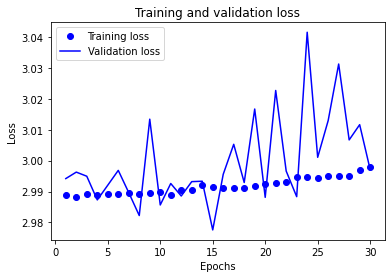

In [86]:
from matplotlib import pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [124]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend();

In [125]:
x = len(X_train)
np.divide(x, history.history['tn'])


array([0.01071878, 0.01071869, 0.01071871, 0.01071869, 0.01071873,
       0.01071869, 0.01071876, 0.01071871, 0.01071873, 0.01071872,
       0.01071869, 0.0107187 , 0.01071871, 0.01071874, 0.01071873,
       0.01071873, 0.01071871, 0.01071873, 0.01071875, 0.01071875,
       0.01071876, 0.01071874, 0.01071875, 0.01071874, 0.01071875,
       0.01071872, 0.01071875, 0.01071873, 0.01071866, 0.01071868])

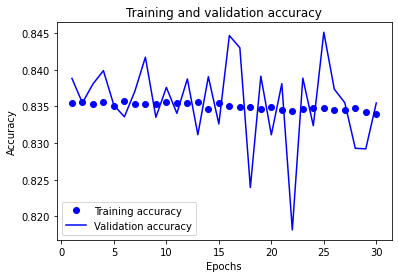

In [126]:
plt.clf()                          
acc = history.history["auc"]
val_acc = history.history["val_auc"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [127]:
## Train a new model at the point of overfitting 

history = model.fit(X_train,
                   y_train,
                   epochs = 30,
                   batch_size = 512,
                   validation_data = (X_val, y_val))

results = model.evaluate(X_test, y_test)

results

Epoch 1/30
2077/2077 [==============================] - 20s 10ms/step - loss: 3.0095 - tp: 28591.0000 - fp: 17477.0000 - tn: 109464736.0000 - fn: 1034343.0000 - accuracy: 0.9905 - precision: 0.6206 - recall: 0.0269 - auc: 0.8339 - prc: 0.1775 - val_loss: 3.1045 - val_tp: 2217.0000 - val_fp: 1688.0000 - val_tn: 10298312.0000 - val_fn: 97783.0000 - val_accuracy: 0.9904 - val_precision: 0.5677 - val_recall: 0.0222 - val_auc: 0.8220 - val_prc: 0.1594
Epoch 2/30
2077/2077 [==============================] - 19s 9ms/step - loss: 3.0110 - tp: 28487.0000 - fp: 17443.0000 - tn: 109464560.0000 - fn: 1034447.0000 - accuracy: 0.9905 - precision: 0.6202 - recall: 0.0268 - auc: 0.8332 - prc: 0.1770 - val_loss: 3.1201 - val_tp: 2682.0000 - val_fp: 1927.0000 - val_tn: 10298073.0000 - val_fn: 97318.0000 - val_accuracy: 0.9905 - val_precision: 0.5819 - val_recall: 0.0268 - val_auc: 0.8107 - val_prc: 0.1609
Epoch 3/30
2077/2077 [==============================] - 19s 9ms/step - loss: 3.0101 - tp: 28512.000

2077/2077 [==============================] - 20s 9ms/step - loss: 3.0179 - tp: 27781.0000 - fp: 17003.0000 - tn: 109465016.0000 - fn: 1035153.0000 - accuracy: 0.9905 - precision: 0.6203 - recall: 0.0261 - auc: 0.8330 - prc: 0.1761 - val_loss: 3.1154 - val_tp: 2942.0000 - val_fp: 2973.0000 - val_tn: 10297027.0000 - val_fn: 97058.0000 - val_accuracy: 0.9904 - val_precision: 0.4974 - val_recall: 0.0294 - val_auc: 0.8147 - val_prc: 0.1578
Epoch 20/30
2077/2077 [==============================] - 20s 10ms/step - loss: 3.0171 - tp: 28527.0000 - fp: 17514.0000 - tn: 109464656.0000 - fn: 1034407.0000 - accuracy: 0.9905 - precision: 0.6196 - recall: 0.0268 - auc: 0.8334 - prc: 0.1764 - val_loss: 3.1918 - val_tp: 4117.0000 - val_fp: 4416.0000 - val_tn: 10295584.0000 - val_fn: 95883.0000 - val_accuracy: 0.9904 - val_precision: 0.4825 - val_recall: 0.0412 - val_auc: 0.7983 - val_prc: 0.1552
Epoch 21/30
2077/2077 [==============================] - 20s 10ms/step - loss: 3.0159 - tp: 28417.0000 - fp: 

[3.178664207458496,
 10255.0,
 7771.0,
 46915928.0,
 445289.0,
 0.9903921484947205,
 0.568900465965271,
 0.022511547431349754,
 0.8148317337036133,
 0.14975769817829132]

In [161]:
results = pd.DataFrame(history.history)

In [185]:
results.index

RangeIndex(start=0, stop=30, step=1)

<function matplotlib.pyplot.show(close=None, block=None)>

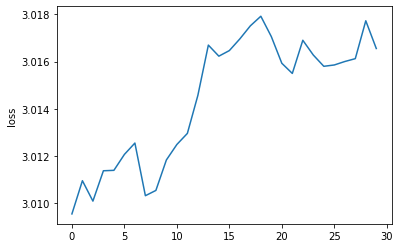

In [188]:
sns.lineplot(x = results.index, y = results['loss'])
plt.show

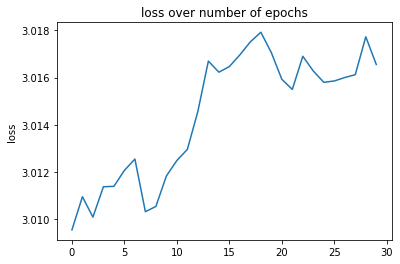

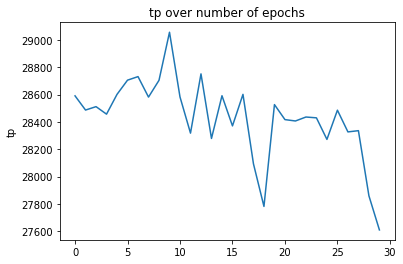

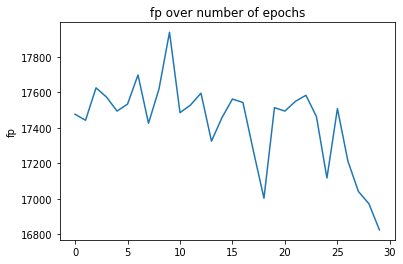

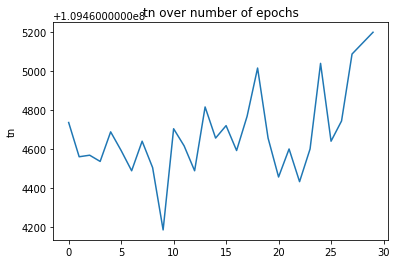

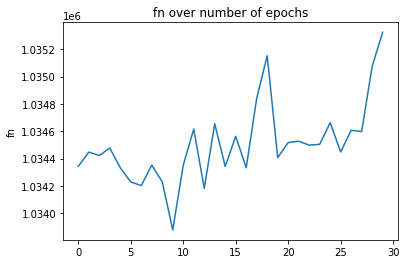

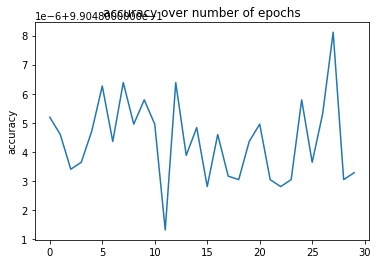

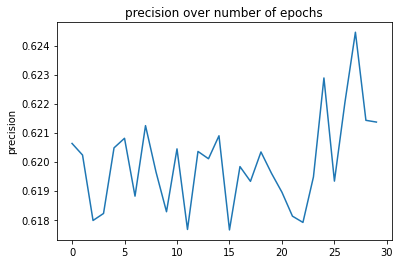

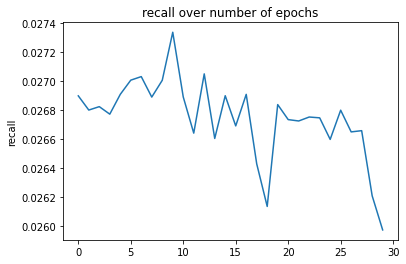

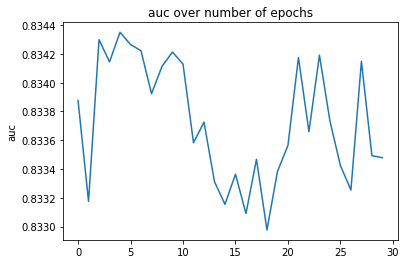

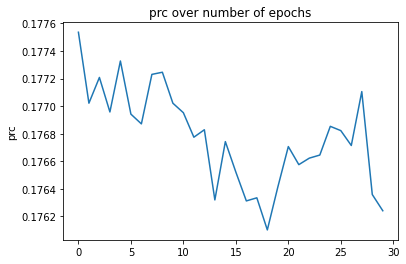

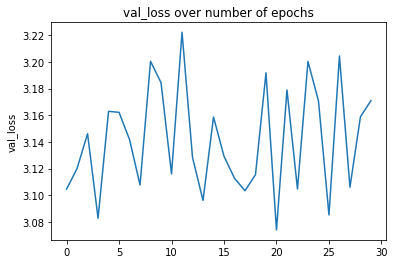

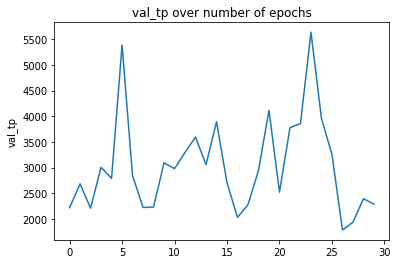

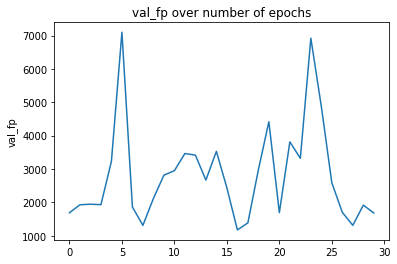

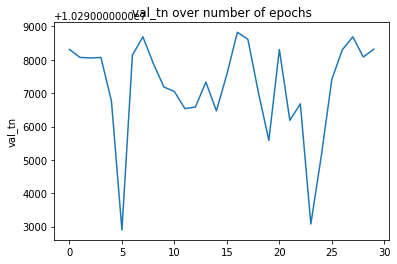

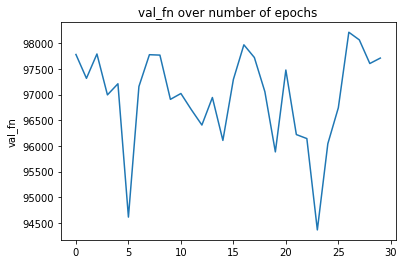

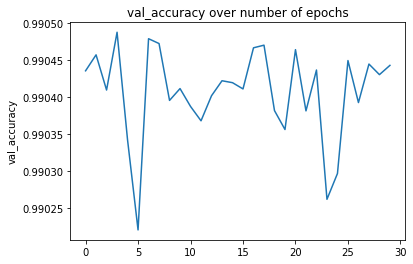

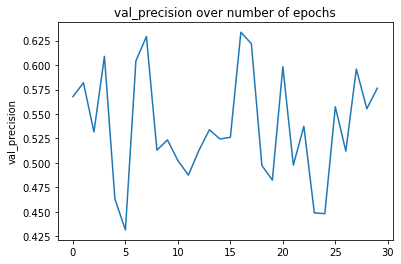

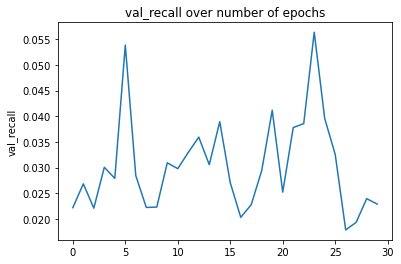

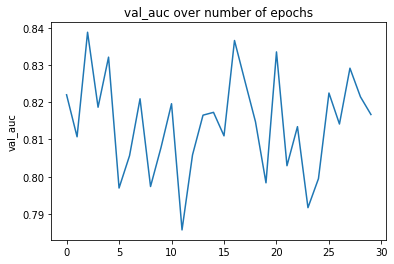

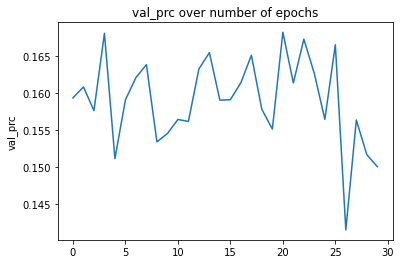

In [196]:
import seaborn as sns
    
for i, col in enumerate(results):
    plt.figure(i)
    sns.lineplot(x = results.index, y = results[col]).set_title(col+" over number of epochs")

In [71]:
labels = df_tgt['beer_style'].unique()
labels

array(['Hefeweizen', 'English Strong Ale', 'Foreign / Export Stout',
       'German Pilsener', 'American Double / Imperial IPA',
       'Herbed / Spiced Beer', 'Light Lager', 'Oatmeal Stout',
       'American Pale Lager', 'Rauchbier', 'American Pale Ale (APA)',
       'American Porter', 'Belgian Strong Dark Ale', 'American IPA',
       'Russian Imperial Stout', 'American Amber / Red Ale',
       'American Strong Ale', 'Märzen / Oktoberfest',
       'American Adjunct Lager', 'American Blonde Ale', 'Euro Pale Lager',
       'English Brown Ale', 'Fruit / Vegetable Beer', 'Belgian Pale Ale',
       'English Bitter', 'English Porter', 'Irish Dry Stout',
       'American Barleywine', 'American Double / Imperial Stout',
       'Doppelbock', 'American Stout', 'Maibock / Helles Bock',
       'Dortmunder / Export Lager', 'Euro Strong Lager',
       'Low Alcohol Beer', 'Extra Special / Strong Bitter (ESB)', 'Bock',
       'English India Pale Ale (IPA)', 'Altbier', 'Kölsch', 'Pumpkin Ale',
       

In [72]:
## Determine the base level accuracy for a random classification in the data set
import random
random.seed(46)
import copy
test_labels_copy = copy.copy(labels)
np.random.shuffle(test_labels_copy)
hit_array = np.array(labels) == np.array(test_labels_copy)
print('The accuracy of a random choice is :',hit_array.mean()*100, '%')

The accuracy of a random choice is : 0.9615384615384616 %
